# <u>The best neighborhood in Pittsburgh by Rowan Morse and Nitin Chandran [CMPINF-0010-Final-Project]</u>

## Introduction
- The goal of this project was to create a data driven argument to make a claim about the "best" neighborhood in Pittsburgh.
- We approached this question by acknowledging that the "best neighborhood" is an objective opinion, so we had to try our best to transform numerical data into an answer. 


## Metric: "Quality of Life"
- In our project we wanted to focus on quality of life/health as our metric.
- To quantify Quality of Life we combined the following submetrics: 
    - Average Daily Car Traffic
    - Average Years of Residence
    - Fire Hazards 
- After individually analysing each submetric we combined them into a cumulative metric called **Quality of Life Score.**
- Process: We explored additional submetrics like Street Tree data, but discarded as the count of trees primarily correlated to how large a neighborhood was. We also thought street trees have a minimal effect on quality of life compared to the other sub-metrics

In [40]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

# <u>Sub Metric 1: Average Daily Car Traffic by Rowan Morse</u>

<img src="https://uninterruptedthoughts.business.blog/wp-content/uploads/2020/02/img_8790.gif" width="750" height="405">


### Why? 
1) **Congestion:** Understanding the amount of traffic in an area is an essential metric for determining how congested an area may be. High congestion could impact the ability to commute impacting their overall quality of life
2) **Urban Planning:** Areas prone to high traffic could correlate with poor urban development, highlighting areas that do not receive sufficient attention from the city in terms of infrastructure and planning.
3) **Emergency Response Time:** High traffic volumes can slow down ambulances, fire trucks, and police vehicles, making it harder to respond quickly to incidents.
4) **Economic:** High traffic may also exist in high economic areas with businesses that attract daily commuters, which would most likely displease residents. 

## Dataset: [<u>City of Pittsburgh Traffic Count</u>](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh)
- The dataset we used was collected by the City of Pittsburgh to determine where to install speed bumps.
- In various locations traffic data was collected over a week span then summed/averaged. 

In [26]:
traffic_data = pd.read_csv("traffic.csv")

- We can see in the code cell below that data was collected in different neighborhoods more times than others (E.g. data was collected from **Squirrel Hill South** 28 different weeks, but only one week for **Allegheny Center.**)

In [36]:
instance_counts = traffic_data.groupby('neighborhood').size()
instance_counts = instance_counts.sort_values(ascending=False).reset_index()
instance_counts

,neighborhood,0
0,Squirrel Hill South,28
1,Bloomfield,21
2,Shadyside,18
3,Mount Washington,16
4,Highland Park,16
...,...,...
69,Regent Square,1
70,Lincoln Place,1
71,Allegheny West,1
72,Oakwood,1


- To solve the issue of different sample sizes for each neighborhood we take the average of the neighborhood samples for average daily car traffic.
- Below we grouped each neighborhood with its mean daily car traffic between all samples and sorted from lowest to highest. This way we can see which neighborhoods had the least traffic

In [42]:
daily_traffic = traffic_data.groupby("neighborhood")['average_daily_car_traffic'].mean()
daily_traffic = daily_traffic.sort_values(ascending=True)
daily_traffic.head(10).reset_index()

,neighborhood,average_daily_car_traffic
0,South Side Flats,115.000000
1,Lincoln Place,126.000000
2,Lincoln-Lemington-Belmar,195.000000
3,Fineview,419.000000
4,Allegheny West,477.000000
5,New Homestead,666.000000
6,Overbrook,777.000000
7,Summer Hill,937.000000
8,Upper Hill,953.333333
9,Central Northside,1189.000000


## Visualization: Heat Map 
- We can use a heat map to gain a better understanding of which neighborhoods have the least amount of car traffic

<Axes: >

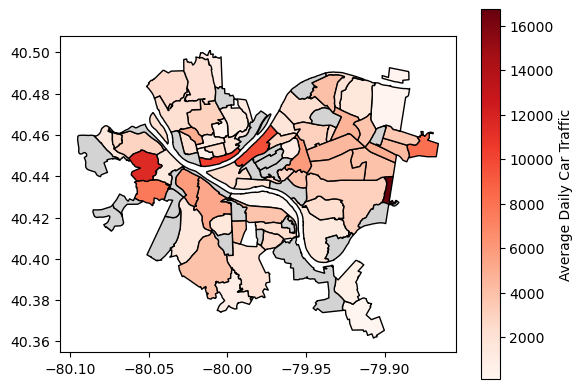

In [43]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
traffic_map = neighborhoods.merge(daily_traffic, how='left', left_on='hood', right_on='neighborhood')
traffic_map[['hood','average_daily_car_traffic','geometry']].head()
traffic_map.plot(column='average_daily_car_traffic', # set the data to be used for coloring
               cmap='Reds',              # choose a color palette
               edgecolor="Black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Average Daily Car Traffic"}, # label the legend
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Problem: Missing Data!!!🚨🚨🚨
- As we can see from the map several neighborhoods are grey. This means that the data set is missing data for average daily car traffic in those specific neighborhood regions. 
### Solution: Fill Missing Data 
- Rather than recording more data or completely scrapping the dataset, we can fill in traffic data for the empty neighborhoods.
    #### What do we fill the missing values with?
  1) One option would be to fill the empty data with zeros, but since our goal is to combine our 3 sub-metrics to conclude the "Best Neighborhood" this would be inefficient for a combined analysis.
  2) Our second option would be to fill the empty data with a single value that represents the middle point of our data: either **mean/average** or **median**.
      - **Mean:** Because mean/average is sensitive to outliers if there are any extreme high/low values using the mean would accurately represent the center of our data.
      - **Median:**  The median is the middle value of the data when it is sorted and is "resistant" to outliers. Therefore, extreme values wont distort the median value.
### By creating a boxplot we can conclude which is a better measure of center between the mean and median. 




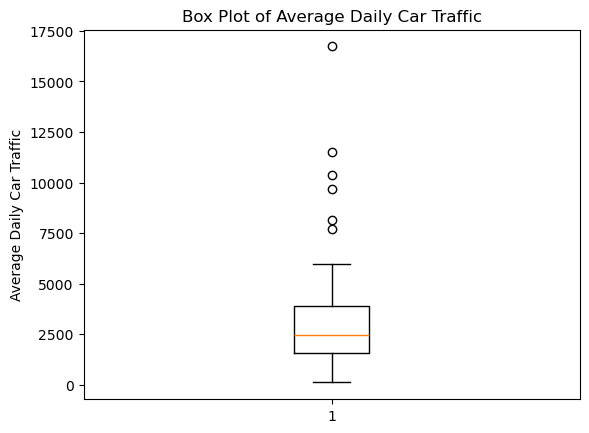

count       64.000000
mean      3292.866280
std       2919.243458
min        115.000000
25%       1556.300000
50%       2439.750000
75%       3920.577778
max      16729.000000
Name: average_daily_car_traffic, dtype: float64


In [44]:
plt.boxplot(daily_traffic.dropna())
plt.title('Box Plot of Average Daily Car Traffic')
plt.ylabel('Average Daily Car Traffic')
plt.show()
print(daily_traffic.describe())

### Boxplot Explanation 
- The circles represent data points that are considered outliers or extreme high values in this case.
- Therefore, nased on the box plot we can conclude that the **median** is the most accurate measure of center.
### Now we can fill in the missing data using the median and replot the heat map!

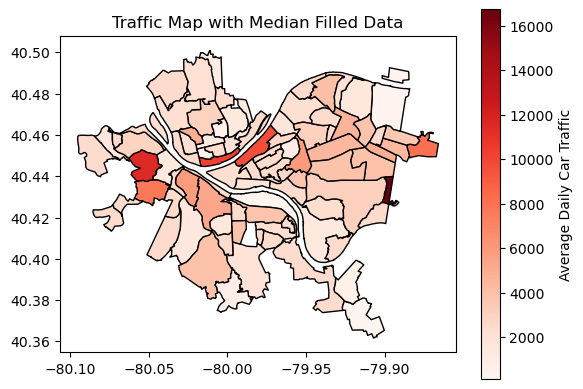

In [51]:
median_traffic = daily_traffic.median() # Calculate median
daily_traffic = daily_traffic.fillna(median_traffic) 
traffic_map['average_daily_car_traffic'] = traffic_map['average_daily_car_traffic'].fillna(median_traffic) # Fill missing data 

## Plot map
traffic_map.plot(column='average_daily_car_traffic', 
                 cmap='Reds', 
                 edgecolor="Black", 
                 legend=True, 
                 legend_kwds={'label': "Average Daily Car Traffic"}, 
                 missing_kwds={"color": "lightgrey"})
plt.title('Traffic Map with Median Filled Data')
plt.show()

## Visualize Data: Bar Chart 
- To visualize the best neighborhoods in terms of low traffic we can create a bar chart of the ten neighborhoods with the least amount of daily car traffic

Text(0, 0.5, 'Average Daily Car Traffic')

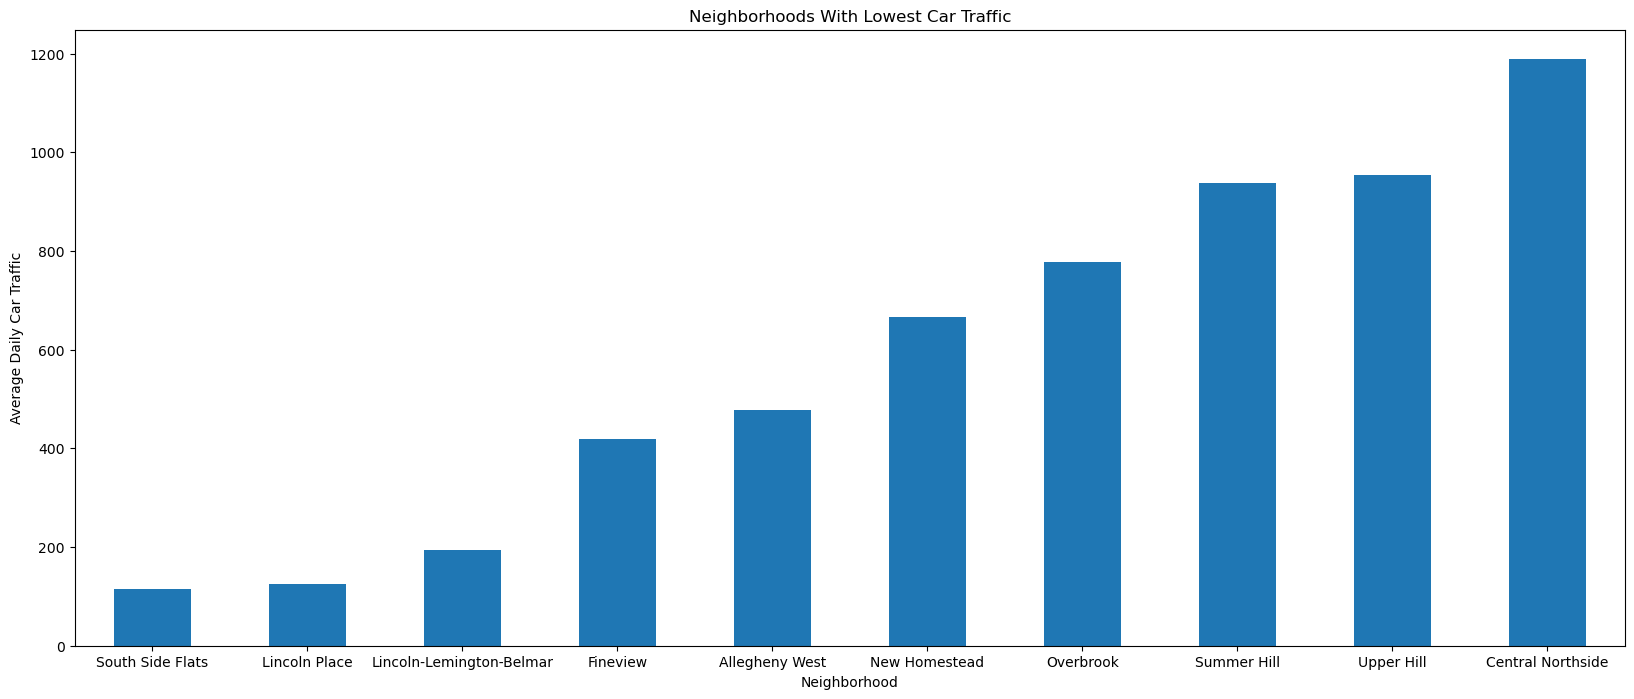

In [46]:
top_10 = daily_traffic.head(10)
traffic_bar = top_10.plot.bar(rot=0,figsize = (20,8))
traffic_bar.set_title('Neighborhoods With Lowest Car Traffic')
traffic_bar.set_xlabel('Neighborhood')
traffic_bar.set_ylabel('Average Daily Car Traffic')

## Traffic Data Conclusion 
- Based on the box plot we can conclude that **South Side Flats and Lincoln Place** are the best Pittsburgh neighborhoods in terms of low average daily traffic. 

# <u>Sub-metric 2: Average Years of Residence by Rowan Morse</u>

<img src="https://media3.giphy.com/media/3o6MbaFkekSATmMTK0/200w.gif?cid=6c09b952nomze1ug7d8yw739mrvpufudinrfklfgzyies9ub&ep=v1_gifs_search&rid=200w.gif&ct=g" width="600" height="450">


### Why? 
1) **Resident Satisfaction:** Longer residence may indicate higher satisfaction and quality of life between the neighborhood and its residents.
2) **Community:** Longer tenure leads to stronger social environment, cooperation among residents, and neighbor-to-neighbor relationships.
3) **Economic Incentive:** Longer residence can signal stable or increasing property values and neighborhood desirability. Residents may hold on to property in hopes of capitalizing of future financial gains



## Dataset: [<u>Neighborhoods with SNAP Data</u>](https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/bce22c26-9d3e-4e3f-8405-a35c4b7765b6)
- The data set is based on information collected by the City of Pittsburgh in 2010.
- It contains nearly 200 attributes/features.
- For analysis, we narrowed the data down to focus on the Average Years of Residence.

In [16]:
snap_data = pd.read_csv("snapdata.csv")

### Reshaping data to only include Neighborhoods and Average Years of Residence 

In [24]:
num_years = snap_data.groupby("Neighborhood_2010_HOOD").sum()['Est__Avg__Yrs__of_Residence__20']
years_sorted = num_years.sort_values(ascending=False).reset_index()
years_sorted.head(10)

,Neighborhood_2010_HOOD,Est__Avg__Yrs__of_Residence__20
0,Chartiers City,32
1,East Carnegie,30
2,New Homestead,19
3,Beltzhoover,17
4,South Shore,16
5,Overbrook,16
6,Lincoln Place,15
7,Bon Air,15
8,Allegheny West,15
9,Ridgemont,13


## Visualization of Average Years of Residence in each Pittsburgh Neighborhood

<Axes: >

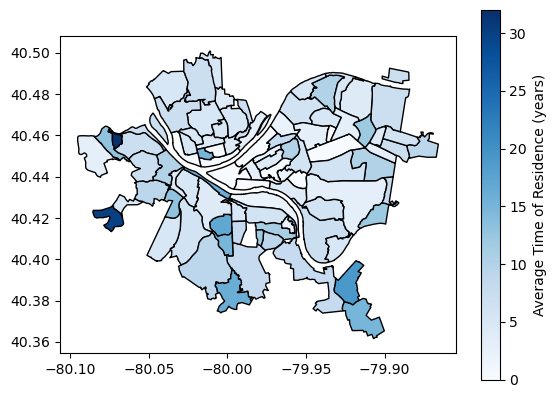

In [18]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
year_map = neighborhoods.merge(num_years, how='left', left_on='hood', right_on='Neighborhood_2010_HOOD')
year_map[['hood','Est__Avg__Yrs__of_Residence__20','geometry']].head()
year_map.plot(column='Est__Avg__Yrs__of_Residence__20', 
               cmap='Blues',             
               edgecolor="Black",        
               legend=True,              
               legend_kwds={'label': "Average Time of Residence (years)"}, 
               missing_kwds={"color": "lightgrey"} 
             )

## Bar Chart displaying the top 10 Pittsburgh Neighborhoods for Average Years of Residence

In [1]:
top_10 = years_sorted.head(10)
years_bar = top_10.plot.bar(rot=0,figsize = (20,8))
years_bar.set_title('Top 10 Average Time of Residence (years) for Pittsburgh Neighborhoods')
years_bar.set_xlabel('Neighborhood')
years_bar.set_ylabel('Average Time of Residence (years)')

NameError: name 'years_sorted' is not defined

## Residence Data Conclusion 
- Based on the bar chart we can conclude that **Chartiers City and East Carnegie** are the best Pittsburgh Neighborhoods in terms of average time of residence.



# <u>Sub-metric 3: Fire Hazards by Nitin Chandran</u>

<img src="https://media2.giphy.com/media/nrXif9YExO9EI/giphy.gif?cid=6c09b952bpi1p98pa58u1uiz151gx5dmq352lgryzsv02e41&ep=v1_internal_gif_by_id&rid=giphy.gif&ct=g" width="600" height="400">


### Clean data
- First we need to clean and filter the dataset. We are looking at fire incidents in the city of Pittsburgh. We will show the 5 neighborhoods with the least number of incidents.

In [47]:
file_path = '8d76ac6b-5ae8-4428-82a4-043130d17b02.csv'

fire_data = pd.read_csv(file_path)

fire_data_cleaned = fire_data.dropna(subset=['neighborhood'])
neighborhood_fire_counts = fire_data_cleaned['neighborhood'].value_counts()

fire_hazard_summary = neighborhood_fire_counts.reset_index()
fire_hazard_summary.columns = ['neighborhood', 'fire_count']
fire_hazard_summary = fire_hazard_summary.sort_values(by='fire_count', ascending=True)

fire_hazard_summary.head()




,neighborhood,fire_count
90,Mount Oliver Borough,6
89,Regent Square,9
88,East Carnegie,11
87,Mt. Oliver,12
86,Ridgemont,12


### Visualization

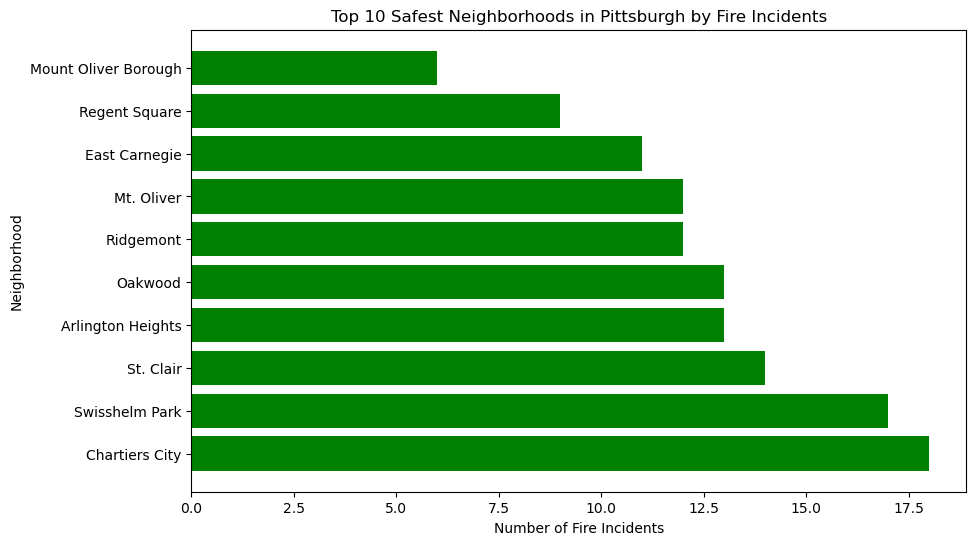

In [48]:
import matplotlib.pyplot as plt

# Visualize the top 10 safest neighborhoods
top_safe_neighborhoods = fire_hazard_summary.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_safe_neighborhoods['neighborhood'], top_safe_neighborhoods['fire_count'], color='green')
plt.xlabel('Number of Fire Incidents')
plt.ylabel('Neighborhood')
plt.title('Top 10 Safest Neighborhoods in Pittsburgh by Fire Incidents')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


### As you can see according to this sub metric, Mount Oliver Borough is the best neighborhood. Eas 

# Combined Metric: Quality of Life Score (QoL_score)

## Normalize: First, since each of our sub-metrics had a different range of data, we need to normalize each value to between 0-1
### Before Normalization: 
- When we merge the data sets and examine the min/max and 50th percentile(median), we can see that the ranges and centers of each sub-metric are drastically different


In [113]:
years_sorted.rename(columns={'Neighborhood_2010_HOOD': 'neighborhood'}, inplace=True)

merged_df = pd.merge(daily_traffic, fire_hazard_summary, on='neighborhood')
merged_df = pd.merge(merged_df, years_sorted, on='neighborhood')
merged_df.describe()


,average_daily_car_traffic,fire_count,Est__Avg__Yrs__of_Residence__20
count,74.000000,74.000000,74.000000
mean,3177.580296,107.554054,6.648649
std,2727.785593,75.707465,5.271875
min,115.000000,9.000000,0.000000
25%,1749.083333,50.000000,4.000000
50%,2439.750000,83.500000,6.000000
75%,3811.785714,154.500000,8.750000
max,16729.000000,307.000000,32.000000


### Normalizing 

#### For each value: $ \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$

In [114]:
for column in ['average_daily_car_traffic', 'fire_count', 'Est__Avg__Yrs__of_Residence__20']:
    min_value = merged_df[column].min()
    max_value = merged_df[column].max()
    merged_df[column] = (merged_df[column] - min_value) / (max_value - min_value)
merged_df.describe()

,average_daily_car_traffic,fire_count,Est__Avg__Yrs__of_Residence__20
count,74.000000,74.000000,74.000000
mean,0.184337,0.330718,0.207770
std,0.164186,0.254052,0.164746
min,0.000000,0.000000,0.000000
25%,0.098356,0.137584,0.125000
50%,0.139927,0.250000,0.187500
75%,0.222510,0.488255,0.273438
max,1.000000,1.000000,1.000000


### After Normalizing
- We can now see that all the data has been adjusted to fit in the range 0-1.
- Now we can combine the submetrics to make a general consensus

## Weighted Quality of Life Score: 
- Not every submetric has an equal impact on "Quality of Life." In this case, Years of residence seems to be the most important metric; whereas, fire hazards are uncommon and not necessary something homeowners worry about.
- To account for this inequality we introduced weights to give each submetric a specific impact on our score. 
- Additionally, Since traffic and fires should have a **negative** impact on our score we reverse each value by subtracting it from one. 



$
\text{Quality of Life Score} = (1 - \text{Daily Traffic}) \cdot w_{\text{1}} + 
(1 - \text{Fire Hazard}) \cdot w_{\text{2}} + 
\text{Years of Residence} \cdot w_{\text{3}}
$

In [115]:
merged_df['rev_average_daily_car_traffic'] = 1 - merged_df['average_daily_car_traffic']
merged_df['rev_fire_count'] = 1 - merged_df['fire_count']

In [122]:
w_1 = 0.3
w_2 = 0.2
w_3 = 0.5

merged_df['QoL_score'] = (
    merged_df['rev_average_daily_car_traffic'] * w_1 +
    merged_df['rev_fire_count'] * w_2 +
    merged_df['Est__Avg__Yrs__of_Residence__20'] * w_3
)

top_3_neighborhoods = merged_df.sort_values(by='QoL_score', ascending=False).head(3)
top_3_neighborhoods

,neighborhood,average_daily_car_traffic,fire_count,Est__Avg__Yrs__of_Residence__20,rev_average_daily_car_traffic,rev_fire_count,QoL_score
34,Chartiers City,0.147827,0.030201,1.00000,0.852173,0.969799,0.949612
5,New Homestead,0.033165,0.043624,0.59375,0.966835,0.956376,0.778201
4,Allegheny West,0.021789,0.114094,0.46875,0.978211,0.885906,0.705020


# Quality of Life Score Visual

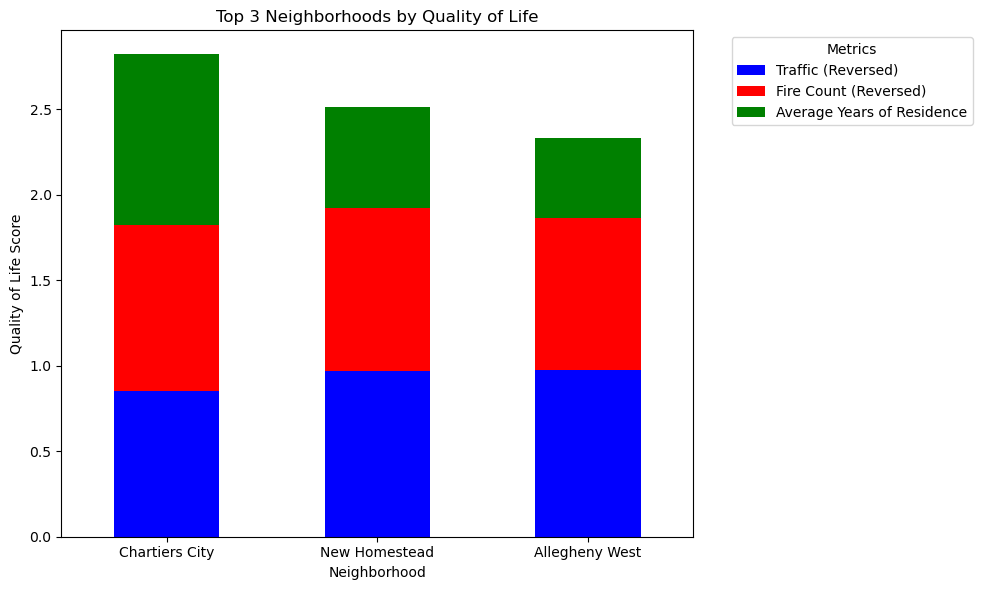

In [128]:
top_3 = top_3_neighborhoods[['rev_average_daily_car_traffic', 'rev_fire_count', 'Est__Avg__Yrs__of_Residence__20']]

colors = ['blue', 'red', 'green']
# Plot the stacked bar chart
top_3.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Customize the plot
plt.title('Top 3 Neighborhoods by Quality of Life')
plt.xlabel('Neighborhood')
plt.ylabel('Quality of Life Score')
plt.xticks(range(3), top_3_neighborhoods['neighborhood'], rotation=0)
legend_labels = ['Traffic (Reversed)', 'Fire Count (Reversed)', 'Average Years of Residence']
plt.legend(legend_labels,title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

## Top 3 Pittsburgh Neighborhoods by Quality of Life 🎉🎉🎉🎉

<img src="https://media0.giphy.com/media/dijK6WYRdSoJEikGPS/giphy.gif?cid=6c09b952xufdazpl378g1ulcqfk3pt5mdf9e012a691h67fc&ep=v1_gifs_search&rid=giphy.gif&ct=g" width="800" height="600">

### 1) Chartiers City 🥇
### 2) New Homestead 🥈
### 3) Allegheny West 🥉

# Conclusions

## Rowan  
>&nbsp;Based on our Quality of Life (QoL) score and the stacked bar graph, I conclude that **Chartiers City** is the best neighborhood in Pittsburgh. It achieved the highest cumulative QoL score, indicating that it outperforms other neighborhoods for our submetrics: low traffic impact, fewer fire hazards, and longer average years of residence. Therefore, making it an ideal place to live.

>&nbsp; However, being from Boston I don't have a personal favorite neighborhood in Pittsburgh as I do not know any of the neighborhoods. If I were to pick an area that I like, I would say when I walk around the areas near CMU I enjoy how it is less dense with trees while also having a city feel. Given a map I would not be able to locate Chartiers City, and I am aware of the possibility that a Pittsburgh native would be confused by our conclusion, but the data we collected suggests that Chartiers City ranks as the best neighborhood in Pittsburgh based on our analysis. I believe this shows how data cannot answer every question as some questions are subjective and do not have a correct calculable answer. 








## Nitin

>&nbsp; Based on our data and our Quality of Life score Chartiers City ranks as the Best Neighborhood in Pittsburgh. Despite earning the highest total score based on our data, my personal favorite neighborhood is Squirrel Hill. It performed well in a several submetrics but did not achieve notable a cumulative score. 
